### model 4 - Batch Normalization added to every convolution layer except last one 

#### Target:
1. Make the model lighter 
3. Add Batch normalization to increase model efficiency and improve accuracy

#### Results:
Total parameters: 8,714
Best Training Accuracy - 99.41 at the 15th Epoch
Best Testing Accuracy - 99.29 at the 14th epoch

#### Analysis:
1. Train and test discrepancy is less and is around 0.12 and model seems to be good. 
2. Accuracy of train and test has increased after applying batch normalization. the testing accuracy has increased from 98.82 to 99.29 and train accuracy from 98.82 to 99.41 
3. Less overfitting and hence can be altered for better accuracy
4. Parameters are also reduced

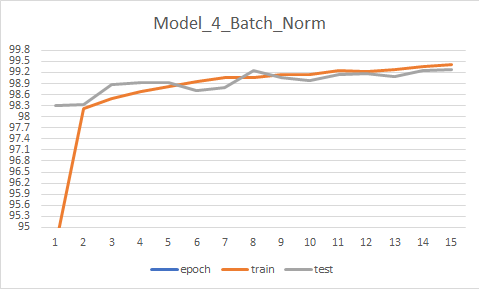

# Import Libraries

In [1]:
from __future__ import print_function
import torch
# import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from utils import train_test_dataloader
import models
from models import model_summary, train, test, plot_accuracy_loss, model4

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)


# Train data transformations
train_transformer = [transforms.RandomRotation((-7., 7.), fill=0),transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,)),]

# Test Phase transformations
test_transformer = [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train and test dataloader
train_loader,test_loader = train_test_dataloader(train_transformer, test_transformer, dataloader_args)

CUDA Available? True
Device:  cuda


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [3]:
# sending model to device
model = model4().to(device)

# Generating model summary
model_summary(model,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
            Conv2d-4           [-1, 12, 28, 28]           1,080
       BatchNorm2d-5           [-1, 12, 28, 28]              24
              ReLU-6           [-1, 12, 28, 28]               0
         MaxPool2d-7           [-1, 12, 14, 14]               0
            Conv2d-8           [-1, 10, 14, 14]             120
              ReLU-9           [-1, 10, 14, 14]               0
           Conv2d-10           [-1, 10, 12, 12]             900
      BatchNorm2d-11           [-1, 10, 12, 12]              20
             ReLU-12           [-1, 10, 12, 12]               0
           Conv2d-13           [-1, 12, 10, 10]           1,080
      BatchNorm2d-14           [-1, 12,

# Let's Train and test our model

In [4]:
model =  model4().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.14224524796009064 Batch_id=468 Accuracy=94.51: 100%|██████████| 469/469 [00:25<00:00, 18.52it/s]



Test set: Average loss: 0.0570, Accuracy: 9831/10000 (98.31%)

EPOCH: 1


Loss=0.03554729372262955 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:21<00:00, 22.28it/s]



Test set: Average loss: 0.0474, Accuracy: 9834/10000 (98.34%)

EPOCH: 2


Loss=0.02204774133861065 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:21<00:00, 22.25it/s]



Test set: Average loss: 0.0350, Accuracy: 9887/10000 (98.87%)

EPOCH: 3


Loss=0.020865483209490776 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:22<00:00, 20.98it/s]



Test set: Average loss: 0.0299, Accuracy: 9892/10000 (98.92%)

EPOCH: 4


Loss=0.03546855226159096 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:23<00:00, 20.06it/s]



Test set: Average loss: 0.0322, Accuracy: 9892/10000 (98.92%)

EPOCH: 5


Loss=0.03794345259666443 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:22<00:00, 21.05it/s]



Test set: Average loss: 0.0381, Accuracy: 9872/10000 (98.72%)

EPOCH: 6


Loss=0.01935466378927231 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:22<00:00, 21.22it/s]



Test set: Average loss: 0.0343, Accuracy: 9878/10000 (98.78%)

EPOCH: 7


Loss=0.019730107858777046 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:21<00:00, 21.55it/s]



Test set: Average loss: 0.0236, Accuracy: 9925/10000 (99.25%)

EPOCH: 8


Loss=0.0318424217402935 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:21<00:00, 22.18it/s]



Test set: Average loss: 0.0291, Accuracy: 9905/10000 (99.05%)

EPOCH: 9


Loss=0.06407494843006134 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:21<00:00, 22.06it/s]



Test set: Average loss: 0.0293, Accuracy: 9898/10000 (98.98%)

EPOCH: 10


Loss=0.06562022119760513 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:22<00:00, 20.99it/s]



Test set: Average loss: 0.0247, Accuracy: 9913/10000 (99.13%)

EPOCH: 11


Loss=0.010892906226217747 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:22<00:00, 20.87it/s]



Test set: Average loss: 0.0232, Accuracy: 9918/10000 (99.18%)

EPOCH: 12


Loss=0.03925556316971779 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:22<00:00, 20.82it/s]



Test set: Average loss: 0.0270, Accuracy: 9908/10000 (99.08%)

EPOCH: 13


Loss=0.007491060066968203 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:21<00:00, 21.57it/s]



Test set: Average loss: 0.0235, Accuracy: 9924/10000 (99.24%)

EPOCH: 14


Loss=0.0038405442610383034 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:21<00:00, 22.24it/s]



Test set: Average loss: 0.0227, Accuracy: 9929/10000 (99.29%)



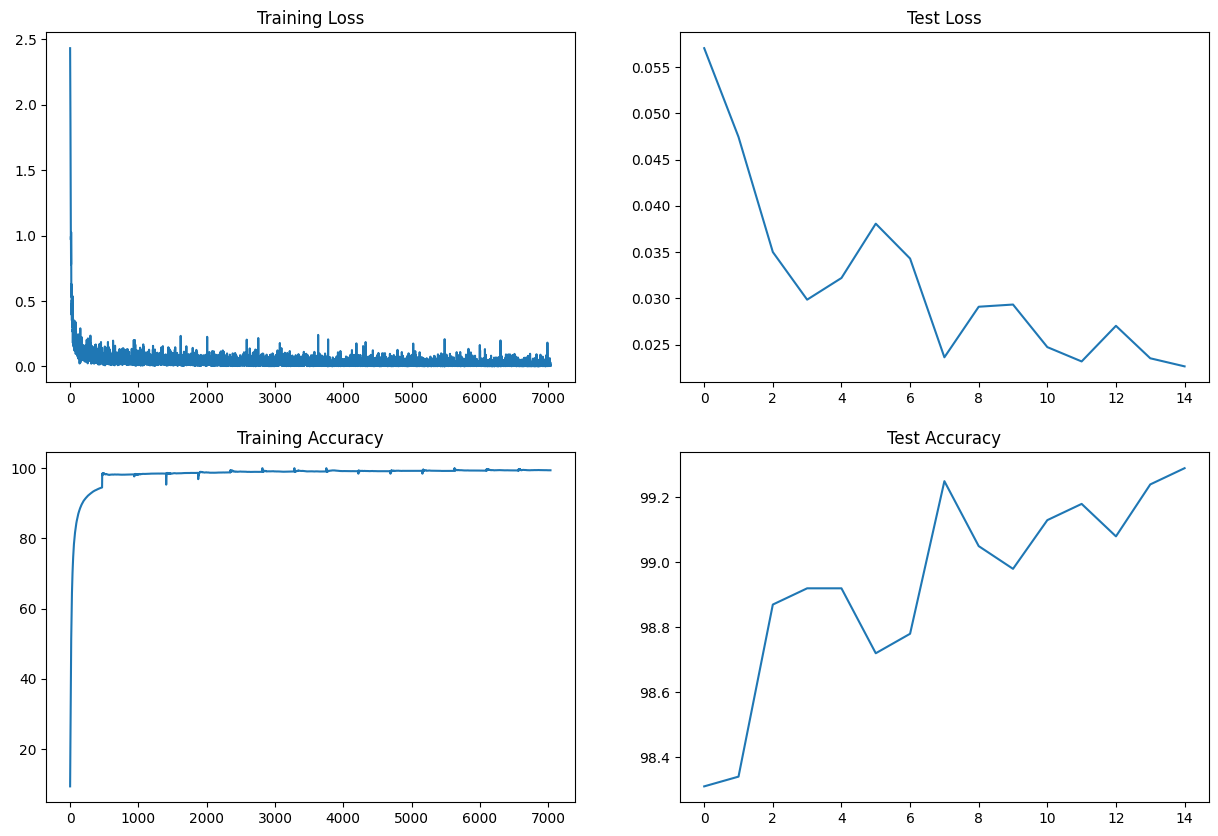

In [5]:
plot_accuracy_loss()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


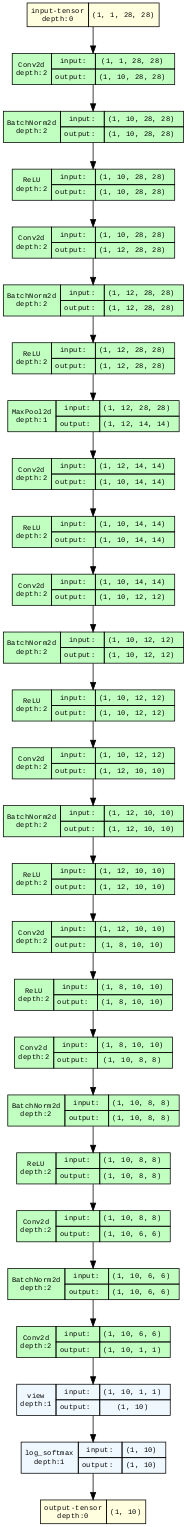

In [6]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(model4(), input_size=(1,1,28,28), expand_nested=False)
model_graph.visual_graph